# Importing Essentials


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [0]:
import tensorflow as tf

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# unzipping the zip file

In [0]:
!unzip -q '/content/drive/My Drive/FuseAi training/Datasets/personal-cars-classifieds (1).zip'

replace all_anonymized_2015_11_2017_03.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
data_path = '/content/all_anonymized_2015_11_2017_03.csv'

# Reading the CSV file

In [0]:
datas = pd.read_csv(data_path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Few information on data

In [0]:
datas.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [0]:
 datas.isna().sum()

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
color_slug             3343411
stk_year               1708156
transmission            741630
door_count              614373
seat_count              749489
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64

In [0]:
datas.shape

(3552912, 16)

In [0]:
datas.columns

Index(['maker', 'model', 'mileage', 'manufacture_year', 'engine_displacement',
       'engine_power', 'body_type', 'color_slug', 'stk_year', 'transmission',
       'door_count', 'seat_count', 'fuel_type', 'date_created',
       'date_last_seen', 'price_eur'],
      dtype='object')

In [0]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   color_slug           object 
 8   stk_year             object 
 9   transmission         object 
 10  door_count           object 
 11  seat_count           object 
 12  fuel_type            object 
 13  date_created         object 
 14  date_last_seen       object 
 15  price_eur            float64
dtypes: float64(5), object(11)
memory usage: 433.7+ MB


# removing the feture with more than $20 $% null value

In [0]:
datas = datas.loc[:, datas.isnull().mean()<0.3]

In [0]:
datas.columns

Index(['maker', 'mileage', 'manufacture_year', 'engine_displacement',
       'engine_power', 'transmission', 'door_count', 'seat_count',
       'date_created', 'date_last_seen', 'price_eur'],
      dtype='object')

# Dropping $date\_created$ and $date\_last\_seen$ from data because they hold no significant value to the dataset

In [0]:
datas.drop(['date_created', 'date_last_seen', ], axis=1, inplace=True)

# Replacing all the $none$ values with $nan$ values

In [0]:
datas['door_count'] = datas['door_count'].replace('None', np.nan)
datas['seat_count'] = datas['seat_count'].replace('None', np.nan)

# Typecasting object into float

In [0]:
datas['door_count'] = datas['door_count'].astype(float, )
datas['seat_count'] = datas['seat_count'].astype(float, )

# Processing Numerical data



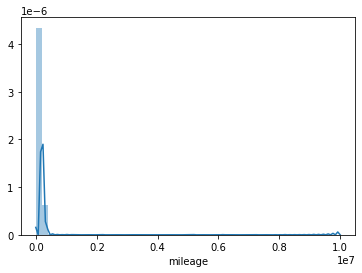

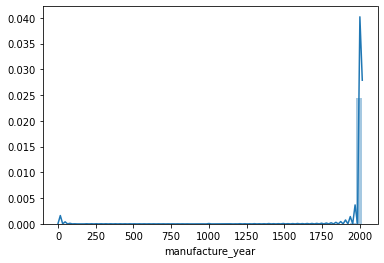

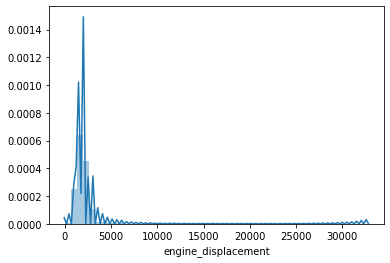

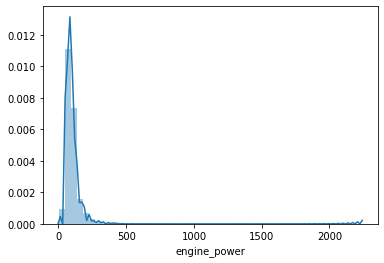

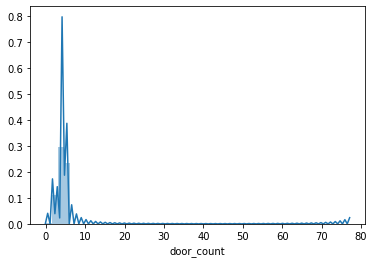

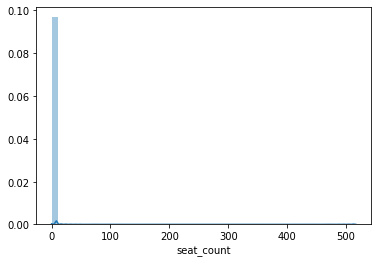

In [0]:


def random_number(mean, std):
  rand_num = np.random.randint(low = mean - std, high = mean + std, size = 1)
  return rand_num

def process_numerical_data(heading):
    sns.distplot(datas[heading])
    plt.show()
    mean = datas[heading].mean()
    std = datas[heading].std()
    datas[heading] = datas[heading].fillna(int(random_number(mean, std)))

numerical_datas = ['mileage', 'manufacture_year', 'engine_displacement', 'engine_power','door_count', 'seat_count']

for data in numerical_datas:
  process_numerical_data(data)

# correlation heatmap for all the numerical data

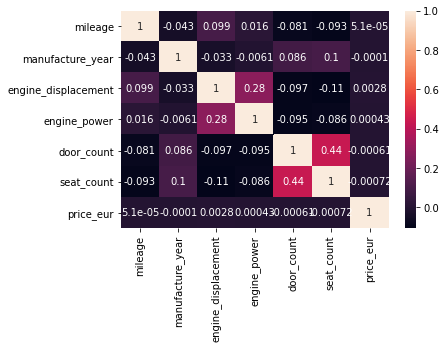

In [0]:
f, ax = plt.subplots()
sns.heatmap(datas.corr(), annot = True)
plt.show()

# Scaling the numerical data

In [0]:
scaler = StandardScaler()
for heading in numerical_datas:
   datas[heading] = scaler.fit_transform(datas[heading].values.reshape(-1, 1))

# Processing categorical data

In [0]:
label_encoder = LabelEncoder()

def process_categorical(heading):
  print(f'Processing {heading}')
  sns.catplot(kind='count', x=heading, data = datas)
  plt.show()

  datas[heading].fillna(datas[heading].mode()[0], inplace=True)
  items = datas[heading].unique()
  i=0
  item_map = {}
  for item in items:
      item_map[item] = i
      i += 1

  datas[heading] = datas[heading].map(item_map)
  datas[heading] = label_encoder.fit_transform(datas[heading])
  

to_process_categorical = ['maker', 'transmission',]



Processing maker


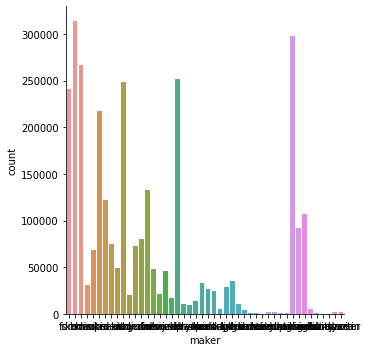

Processing transmission


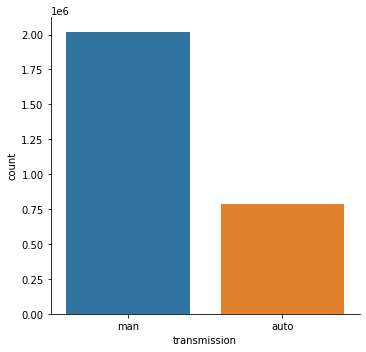

In [0]:
for data in to_process_categorical:
  process_categorical(data)

# output after data processing

In [0]:
datas.head(12)

,maker,mileage,manufacture_year,engine_displacement,engine_power,transmission,door_count,seat_count,price_eur
0,0,0.051548,0.162423,-0.026835,-0.001729,0,1.327277,2.125189,10584.75
1,1,0.028664,0.175295,-0.026835,-0.476524,0,1.327277,0.611323,8882.31
2,2,-0.110631,0.149551,-0.029684,-0.390198,0,1.327277,0.611323,12065.06
3,1,-0.067157,0.072321,-0.482586,-1.210298,0,1.327277,0.611323,2960.77
4,1,-0.015709,0.072321,-0.482586,-1.210298,0,1.327277,0.611323,2738.71
5,1,0.020927,0.059449,-0.482586,-1.361370,0,1.327277,0.611323,1628.42
6,1,0.100879,0.033706,-0.368648,-0.627595,0,1.327277,0.611323,2072.54
7,2,0.043944,0.136680,-0.026835,0.580973,1,1.327277,0.611323,10547.74
8,1,-0.087173,0.059449,-0.083804,-0.476524,0,1.327277,0.611323,4293.12
9,1,0.508914,0.046578,-0.083804,-0.325453,0,1.327277,0.611323,1332.35


# algorithms to use mdata on

In [0]:
def methods(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    lin_pred = lin_reg.predict(X_test)
    
    dtree = DecisionTreeRegressor(criterion='mse')
    dtree.fit(X_train, y_train)
    dtree_pred = dtree.predict(X_test)
    
    result( lin_pred, dtree_pred, y_test)

def result( lin_pred, dtree_pred, y_test):
    print("\t****R2- Score****")
    print(f'For DT: {r2_score(y_test, dtree_pred)} ')
    print(f'For LR: {r2_score(y_test, lin_pred)} \n\n\n')
    
    print("\t****MAE****")
    print(f'For DT: {mean_absolute_error(y_test, dtree_pred)} ')
    print(f'For LR: {mean_absolute_error(y_test, lin_pred)} \n\n\n')
    
    print("\t****MSE****")
    print(f'For DT: {mean_squared_error(y_test, dtree_pred)} ')
    print(f'For LR: {mean_squared_error(y_test, lin_pred)} ')

In [0]:
X = datas.drop('price_eur', axis=1)
y = datas['price_eur']

# Final result

In [0]:
methods(X, y)

	****R2- Score****
For DT: -4.235537312183245 
For LR: -0.09244974423884056 



	****MAE****
For DT: 1208265.8799431047 
For LR: 3183675.4622462825 



	****MSE****
For DT: 3278275077957997.0 
For LR: 684046461119830.6 
